# Covid-19 Impact on Company Performance
### Turner Sale
### July 2020

## Purpose

As Covid-19 has ravaged much of the US economy, Company A has not been immune to the inevitable effects of a reduced labor force and impacted sales pipeline. The impacts of Covid-19 are clear to all observers, but the extent to which and the predictive capacity is not yet clear. This paper will be focused on determining the best model for predicting critical manufacturing success metrics using Covid-19 as part of the feature set. There are of course underlying patterns and trends inside the company (and internal projects to improve efficiency), but Covid-19 provides a new challenge. The impact of local, state, and regional cases, as well as governmental actions have led to an interesting new chapter in the company's history.

In order to measure the impacts of Covid-19 (as well as predict potential future impacts) data will be collected from the shipping and production areas of our manufacturing center. Quality metrics were initially considered as well, but there have been 2 major changes in the past 3 months which have led to the schema changing in accordance which have led to the conclusion that the data is not yet clean enough to be used for this purpose. The lack of history and continual shifts in Quality make it a harder metric to rely upon.

## Objectives

### Primary

The primary objective of this paper is to create a predictive model for on-time shipment with considerations for on-time comletion (of assembled goods). Shipments are the more critical factor as impacts there are more pronounced to the end customer.

This model should have a high accuracy (target of 80%) in predicting on-time shipments and completions. Parsimony (as always) is preferred, but not a prerequisite. Models which are adaptable to future inputs are also preferred.

### On-Time Shipment

On-Time Shipment is perhaps the most critical metric of factory success in our organization. It not only impacts the customer and their satisfaction, but also the ability for our shipping center to continue normal operations. With a JIT (Just In Time) manufacturing push over the past 2 years, we are more and more reliant on accurate and consistent shipping, as space and time are at a premium. This metric is more critical than On-Time Completion, in that it is more likely to affect future orders from customers, as well as recommendations/sales leads.

This metric is reliant upon the On-Time Completion from a process persepective, but supercedes it in importance to end users (and managers internally). 

### On-Time Completion

The On-Time Completion metrics measure the performance of our Assembly group which feeds materials to the Shipping group. Without a stable assembly process, the Shipping group would be unable to handle the swings in volume. Therefor, we have begun the process of level loading with great success in process change and simplicity. This however does not always translate to success in the final results, especially during a time of crisis.

This measure, and the On-Time Shipment metric as well, is broken into three main categories for greater clarity and utitlity (on-time, early and late). These two metrics combined should provide an interesting cross section of the business (for example, has Covid-19 had a greater impact on one or the other, or does the On-Time Completion metrics perhaps outweight Covid-19 as a predictor).

## Feasibility Assessment

### Resources

The primary resources to be utilized are the Data Warehouse (inlcuding SQL Server resources) and Python. Both resources are available to the data scientist and require no additional cost. The time spent on this project is to be recorded for the purposes of Company A should they decide the effort was worthwhile, else the data scientist will absorb all costs associated.

### Risks

Primary risk is low predictive value. There are no major costs or process stoppages that may impact this project. Additionally, all work is done with open source software or licensed enterprise tooling that is easily accessible.

### Constraints

As there are no employee or other sensitive data sources and we do not have any constraints on data access other than the removal of costs fields. These fields are accessible to Company A employees but might not be appropriate for external viewing. The only major constraint is the accessibility of highly detailed Covid-19 data. This data is available on county and other such levels, but not city or personal levels. Thus we can only utilize the data available to the public.


## Data Background

### On-Time Shipment

On-Time Shipments data is readily available in the Data Warehouse as this information tracks every single shipment leaving our stock or facilities. These lines are created in the normal shipment process when a supervisor finalizes the shipment. This in turn creates a "Packing Slip" of the inventory being shipped, warehouse ledger entries (for stockkeeping) and most importantly: Sales Shipment Lines. These lines are the ones we are capturing for this analysis. Each line indicates a product in/on a shipping unit (pallet, box, etc.). This means that a single sales line may contain multiple shipments lines. This gives us the benefit of knowing if the status of each shipment, not just the collective status of a higher level lines (like sales lines).

The volume of data is roughly in the hundres to thousands of lines per working day. These lines are both highly accurate (as they determine certain accouting and stockkeeping functions) and are part of a now highly stable process. The quality of lines has dramatically improved over the past 2 years and the past 12 months (after transitioning to a new facility) have had very little noticeable error lines. The process also provides validity to the measurement, as this is a regularly measured feature of our company and is maintained and reviewed on a regular basis.


### On-Time Completion

On-Time Completion is a critical measure of assembly/production success. This metric is used both inside and outside the production group and provides valuable information regarding the ability and capacity at hand. Periods of high performance regularly reduce overhead while poor performance impacts both overhead and customer satisfaction. This data is on the magnitude of several hundred lines per day, depending heavily on the mix of product types.

In order to measure On-Time Completion, we must capture the correct due date and the correct completion date. A unique aspect of our organization is the concept of a production order. These production orders contain one or more proucts of the same item number. This provides a way to consolidate the picking procedures and build the same product in sequence. This does however mean that we must consider the production order as completed only when all products related to it are complete. Because of this, we will be counting the number of prodction orders rather than the number of produced components inside of them. This is the standard for our organization internationally as well.

The process of claiming labor and outputing the final product is very stable in our production group. The quality is some of the highest outside the Finance realm.

### Covid-19

Covid-19 data is collected primarily through governmental organizations and distributed through groups like the CDC or universities like John's Hopkins University. This paper focuses on several components of Covid-19 data:
- United States
    - All cases and deaths
    - New cases and deaths
- Michigan
    - All cases and deaths
    - New cases and deaths
    - Mask requirement orders
    - Stay at home orders
    - Safer at home orders
- Companu A's County
    - All cases and deaths
    - New cases and deaths

These sources will be combined to provide a more detailed picture of the situation that Company A is working within. The inclusion of cases and deaths should provide direct impacts on population, while executive orders and governmental mandates should provide context to the situation.

### Data Granularity

All data is collected and/or aggregated on a daily grain. Smaller grains are not pertinent to this analysis (hourly does not provide any benefit nor is the information available). Weekly aggregations may be of value as well, but in this case they are not considered. Additionally, non-working dates will be excluded. We do have times where overtime is required, but none of the processes are designed specifically for that in mind, thus it is always used as a "makeup" period.


## Data Collection

### On-Time Shipments

On-Time Shipments are captured from the Data Warehouse utilizing SQL for the main work. This is both for performance purposes (all resources are internationally located and accessed across a VPN) and for speed (I have more SQL experience, although the method used is not necessarily the best). The SQL code is provided for clarity in the advent that certain metrics are misunderstood. Certain components have been redacted and only the fields required are included in the collection.

The output from SQL is then saved as a csv for ease of use. Python is then utlized for the remainder of the data cleansing/transformation.


In [ ]:
# DROP TABLE IF EXISTS #ships
# DROP TABLE IF EXISTS #ship_group

# SELECT ships.*
# INTO #ships
# FROM (
# 	SELECT sl.[Posting Date]
# 		,sl.[Document No_]
# 		,sl.[Line No_]
# 		,CASE 
# 			WHEN sl.[Posting Date] > [Planned Shipment Date]
# 				THEN 'Late'
# 			WHEN sl.[Posting Date] < [Planned Shipment Date]
# 				THEN 'Early'
# 			WHEN sl.[Posting Date] = [Planned Shipment Date]
# 				THEN 'On-Time'
# 			ELSE NULL
# 			END AS 'On-Time Status'
# 	FROM [Sales Shipment Line] AS sl
# 	WHERE [Posting Date] BETWEEN '01/01/2020' AND '07/31/2020'
# 	) AS ships

# SELECT *
# INTO #ship_group
# FROM (
# 	SELECT ships.[Posting Date]
# 		,ships.[On-Time Status]
# 		,CAST(COUNT(ships.[Line No_]) AS decimal(20,6)) AS 'Line Count'
# 	FROM #ships AS ships
# 	GROUP BY ships.[Posting Date]
# 		,ships.[On-Time Status]
# 	) AS ship_group

# SELECT *
# 	,[Line Early] / [Total Lines] AS 'Line Early Prop'
# 	,[Line On-Time] / [Total Lines] AS 'Line On-Time Prop'
# 	,[Line Late]/ [Total Lines] AS 'Line Late Prop'
# INTO #line
# FROM (
# 	SELECT [Posting Date]
# 		,ISNULL([Early],0) AS 'Line Early'
# 		,ISNULL([On-Time],0) AS 'Line On-Time'
# 		,ISNULL([Late],0) AS 'Line Late'
# 		,ISNULL([Early],0) + ISNULL([On-Time],0) + ISNULL([Late],0) AS 'Total Lines'
# 	FROM (
# 		SELECT [Posting Date]
# 			,[Line Count]
# 			,[On-Time Status]
# 		FROM #ship_group
# 		) AS piv_src
# 	PIVOT (
# 		SUM(piv_src.[Line Count])
# 		FOR piv_src.[On-Time Status] IN ([Early],[On-Time],[Late])
# 		) AS piv
# 	) AS input
# ORDER BY input.[Posting Date]

In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [41]:
ships = pd.read_csv('G:\Shared drives\Sale\Escuela\Elmhurst_MSDS\MDS_576_research_methods\shipments.csv')

ships.head(5)

,Posting Date,Line Early,Line On-Time,Line Late,Total Lines,Line Early Prop,Line On-Time Prop,Line Late Prop
0,2020-01-02 00:00:00.000,216.0,79.0,70.0,365.0,0.591780,0.216438,0.191780
1,2020-01-03 00:00:00.000,156.0,42.0,87.0,285.0,0.547368,0.147368,0.305263
2,2020-01-06 00:00:00.000,264.0,22.0,131.0,417.0,0.633093,0.052757,0.314148
3,2020-01-07 00:00:00.000,357.0,15.0,185.0,557.0,0.640933,0.026929,0.332136
4,2020-01-08 00:00:00.000,283.0,23.0,94.0,400.0,0.707500,0.057500,0.235000


As can be seen above, the final result is a dataframe at a daily grain that contains several calculated values:
- Line Early/On-Time/Late = the count of lines which shipped early/on-time/late
- Total Lines = the count of all lines shipped that daily
- Line Early/On-Time/Late Prop = the proportion of all lines in that day that shipped early/on-time/late

These values are both nominal and relative in order to provide additional features for modeling, and is also commonplace in our organzation for providing a clearer picture of what is going on at the factory (in effect it provides volume and normalized performance data).

### On-Time Completion

On-Time Completion is very similar to the On-Time Shipments in concept, but has metrics for two different methods: lines and hours. Lines provide us the number of different production orders while hours provides a more normalized value (not truly normalized, but it is what we use to level load the production centers). It is also entirely possible to break down this concept even further (to the work center, or building) but this would likely be less valuable information as workers can be moved between work centers, thus negating some of the largest swings. Further granularity would also require tooling other than SQL, as the pivoting/melting functions are not as robust (as can be seen in the somewhat convluded code below).

In [ ]:
# DROP TABLE IF EXISTS #prod_orders
# DROP TABLE IF EXISTS #prod_time
# DROP TABLE IF EXISTS #prod_group
# DROP TABLE IF EXISTS #lines
# DROP TABLE IF EXISTS #time

# SELECT *
# INTO #prod_orders
# FROM (
# 	SELECT pol.[Prod_ Order No_]
# 		,pol.[Line No_]
# 		,(CASE 
# 			WHEN pol.[Modified Ending Date] != '1753-01-01 00:00:00.000' THEN pol.[Modified Ending Date]
# 			ELSE pol.[Ending Date]
# 			END
# 			) AS 'Modified Ending Date' --Specialty field for level loading the prodution floor, built on a due date and modifier
# 		,porl.[Run Time] * pol.[Quantity] AS 'Total Run Time' --Time to build
# 		,(SELECT MAX(cle.[Posting Date])
# 			FROM [TGW-ERMANCO$Capacity Ledger Entry] AS cle
# 			WHERE cle.[Prod_ Order No_] = pol.[Prod_ Order No_]
# 				AND cle.[Prod_ Order Line No_] = pol.[Line No_]
# 				AND cle.[Work Center No_] = 'PUTAWAY'
# 			) AS 'Putaway Date' --Date in which the worker completes the assembly and the item goes on stock for shipment
# 	FROM [TGW-ERMANCO$Prod_ Order Line] AS pol
# 		LEFT JOIN [TGW-ERMANCO$Prod_ Order Routing Line] AS porl
# 			ON pol.[Prod_ Order No_] = porl.[Prod_ Order No_]
# 	WHERE porl.[Process Structure Code] = 'ASS' --Unfortunate naming convention for Assembly
# 		AND pol.[Modified Ending Date] BETWEEN '01/01/2020' AND '07/31/2020'
# 		AND pol.[Item Category Code] = 'PRODUCT' --Only looking for items which we are producing (we could have an outside supplier with some other categories)
# 		AND pol.[Status] = 4 --Completed
# 		AND pol.[Destination] IN (SELECT [No_]
# 									FROM [TGW-ERMANCO$Work Center]
# 									WHERE [Active Reporting] = 1
# 									) --The work centers that are considered relevant in our business
# 	) AS prod_orders

# SELECT *
# INTO #prod_time
# FROM (
# 	SELECT prod_ords.*
# 		,CASE 
# 			WHEN prod_ords.[Putaway Date] > prod_ords.[Modified Ending Date]
# 				THEN 'Late'
# 			WHEN prod_ords.[Putaway Date] < prod_ords.[Modified Ending Date]
# 				THEN 'Early'
# 			WHEN prod_ords.[Putaway Date] = prod_ords.[Modified Ending Date]
# 				THEN 'On-Time'
# 			ELSE 'N/A'
# 			END AS 'On-Time Status'
# 	FROM #prod_orders AS prod_ords
# 	) AS prod_time

# SELECT *
# INTO #prod_group
# FROM (
# 	SELECT prod_time.[Putaway Date]
# 		,prod_time.[On-Time Status]
# 		,CAST(COUNT(prod_time.[Line No_]) AS decimal(20,6)) AS 'Line Count'
# 		,SUM(prod_time.[Total Run Time]) AS 'Total Run Time'
# 	FROM #prod_time AS prod_time
# 	GROUP BY prod_time.[Putaway Date]
# 		,prod_time.[On-Time Status]
# 	) AS prod_group

# SELECT *
# 	,[Line Early] / [Total Lines] AS 'Line Early Prop'
# 	,[Line On-Time] / [Total Lines] AS 'Line On-Time Prop'
# 	,[Line Late]/ [Total Lines] AS 'Line Late Prop'
# INTO #line
# FROM (
# 	SELECT [Putaway Date]
# 		,ISNULL([Early],0) AS 'Line Early'
# 		,ISNULL([On-Time],0) AS 'Line On-Time'
# 		,ISNULL([Late],0) AS 'Line Late'
# 		,ISNULL([Early],0) + ISNULL([On-Time],0) + ISNULL([Late],0) AS 'Total Lines'
# 	FROM (
# 		SELECT [Putaway Date]
# 			,[Line Count]
# 			,[On-Time Status]
# 		FROM #prod_group
# 		) AS piv_src
# 	PIVOT (
# 		SUM(piv_src.[Line Count])
# 		FOR piv_src.[On-Time Status] IN ([Early],[On-Time],[Late])
# 		) AS piv
# 	) AS input
# ORDER BY input.[Putaway Date]

# SELECT *
# 	,[Time Early] / [Total Time] AS 'Time Early Prop'
# 	,[Time On-Time] / [Total Time] AS 'Time On-Time Prop'
# 	,[Time Late]/ [Total Time] AS 'Time Late Prop'
# INTO #time
# FROM (
# 	SELECT [Putaway Date]
# 		,ISNULL([Early],0) AS 'Time Early'
# 		,ISNULL([On-Time],0) AS 'Time On-Time'
# 		,ISNULL([Late],0) AS 'Time Late'
# 		,ISNULL([Early],0) + ISNULL([On-Time],0) + ISNULL([Late],0) AS 'Total Time'
# 	FROM (
# 		SELECT [Putaway Date]
# 			,[Total Run Time]
# 			,[On-Time Status]
# 		FROM #prod_group
# 		) AS piv_src
# 	PIVOT (
# 		SUM(piv_src.[Total Run Time])
# 		FOR piv_src.[On-Time Status] IN ([Early],[On-Time],[Late])
# 		) AS piv
# 	) AS input
# ORDER BY input.[Putaway Date]

# SELECT lines.*
# 	,times.*
# FROM #line AS lines
# 	LEFT JOIN #time AS times
# 		ON lines.[Putaway Date] = times.[Putaway Date]

In [42]:
prods = pd.read_csv('G:\Shared drives\Sale\Escuela\Elmhurst_MSDS\MDS_576_research_methods\production_orders.csv')

prods.head()

,Putaway Date,Line Early,Line On-Time,Line Late,Total Lines,Line Early Prop,Line On-Time Prop,Line Late Prop,Putaway Date.1,Time Early,Time On-Time,Time Late,Total Time,Time Early Prop,Time On-Time Prop,Time Late Prop
0,2020-03-11 00:00:00.000,0.0,0.0,173.0,173.0,0.0,0.0,1.0,2020-03-11 00:00:00.000,0.0,0.0,301.3413,301.3413,0.0,0.0,1.0
1,2020-03-12 00:00:00.000,0.0,0.0,215.0,215.0,0.0,0.0,1.0,2020-03-12 00:00:00.000,0.0,0.0,308.7788,308.7788,0.0,0.0,1.0
2,2020-03-13 00:00:00.000,0.0,0.0,128.0,128.0,0.0,0.0,1.0,2020-03-13 00:00:00.000,0.0,0.0,247.6972,247.6972,0.0,0.0,1.0
3,2020-03-14 00:00:00.000,0.0,0.0,91.0,91.0,0.0,0.0,1.0,2020-03-14 00:00:00.000,0.0,0.0,105.1593,105.1593,0.0,0.0,1.0
4,2020-03-16 00:00:00.000,0.0,0.0,189.0,189.0,0.0,0.0,1.0,2020-03-16 00:00:00.000,0.0,0.0,289.8514,289.8514,0.0,0.0,1.0


Just like the On-Time Shipments data, this dataset contains the line level information by on-time status, as well as the hours of production in a similar method. The left join was required due to the difficulty with the UNPIVOT and PIVOT functions of SQL Server. Perhaps a method in Python would be superior.

### Covid-19 Cases/Deaths

The Covid-19 datasets are collected from usafacts.org (https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/) which is an organization that collects governmental datasets and published them to the public. The county level data available on their site is used both by the CDC and John's Hopkins University (both of which are leading the response to the pandemic). This data is collected in three main components: known cases, deaths, and county population. These three sets are imported (from csv that was downloaded from usafact.org with accurate data through 7/27) and then altered to provide the known cases and deaths for the US as a whole, for Michigan, and for Muskegon county (this is where Company A is located). They are also altered to give the relative cases and deaths per 100k population.


In [15]:
#Import datasets
cases = pd.read_csv('G:\Shared drives\Sale\Escuela\Elmhurst_MSDS\MDS_576_research_methods\covid_confirmed_usafacts.csv')
deaths = pd.read_csv('G:\Shared drives\Sale\Escuela\Elmhurst_MSDS\MDS_576_research_methods\covid_deaths_usafacts.csv')
pop = pd.read_csv('G:\Shared drives\Sale\Escuela\Elmhurst_MSDS\MDS_576_research_methods\covid_county_population_usafacts.csv')

cases.head(3)

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,827,842,857,865,886,905,921,932,942,974
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,1819,1937,2013,2102,2196,2461,2513,2662,2708,2836


In [5]:
#Capture the sum of US cases
cases_us = cases
cases_us.loc['Total',:] = cases_us.sum(axis=0)
cases_us = cases_us.filter(like='Total' ,axis=0)

# Remove unncessary fields and transpose to prepare for joins
cases_us = cases_us.drop(['countyFIPS','County Name','State','stateFIPS'], axis=1)
cases_us_t = cases_us.transpose()

#Add the number of new cases
cases_us_t['New Cases'] = cases_us_t.diff()

#Capture the sum of US deaths
deaths_us = deaths
deaths_us.loc['Total',:] = deaths_us.sum(axis=0)
deaths_us = deaths_us.filter(like='Total' ,axis=0)

# Remove unncessary fields and transpose to prepare for joins
deaths_us = deaths_us.drop(['countyFIPS','County Name','State','stateFIPS'], axis=1)
deaths_us_t = deaths_us.transpose()

#Add the number of new cases
deaths_us_t['New Deaths'] = deaths_us_t.diff()

#Capture the sum of US population
pop_us = pop['population'].sum()

#Join the US cases, deaths, and population
all_us = pd.merge(cases_us_t, deaths_us_t, left_index=True, right_index=True)
all_us['National Population'] = pop_us
all_us = all_us.rename(columns={'Total_x':'Total National Cases','Total_y':'Total National Deaths','Total Cases':'Total National Cases','Total Deaths':'Total National Deaths','New Cases':'New National Cases','New Deaths':'New National Deaths'})

#Add relative values for new cases and deaths compared to population
all_us['National Cases/100k'] = (all_us['Total National Cases']/all_us['National Population']) * 100000
all_us['National Deaths/100k'] = (all_us['Total National Deaths']/all_us['National Population']) * 100000

#Create a relative gain in cases and deaths (new cases/deaths vs. previous days total cases)
all_us['National Case Increase Percent'] = (all_us['New National Cases'] / all_us['Total National Cases'].shift(1)) * 100

all_us.tail()

,Total National Cases,New National Cases,Total National Deaths,New National Deaths,National Population,National Cases/100k,National Deaths/100k,National Case Increase Percent
7/23/20,4006505.0,68408.0,142803.0,1083.0,328239523,1220.604077,43.505730,1.737083
7/24/20,4080584.0,74079.0,144031.0,1228.0,328239523,1243.172657,43.879847,1.848968
7/25/20,4145071.0,64487.0,144706.0,675.0,328239523,1262.818981,44.085489,1.580338
7/26/20,4199864.0,54793.0,145154.0,448.0,328239523,1279.511974,44.221975,1.321883
7/27/20,4259226.0,59362.0,146858.0,1704.0,328239523,1297.596938,44.741108,1.413427


In [6]:
#Capture the sum of Michigan cases
cases_mi = cases
cases_mi = cases_mi[cases_mi['State']=='MI']
cases_mi.loc['Total',:] = cases_mi.sum(axis=0)
cases_mi = cases_mi.filter(like='Total' ,axis=0)

# Remove unncessary fields and transpose to prepare for joins
cases_mi = cases_mi.drop(['countyFIPS','County Name','State','stateFIPS'], axis=1)
cases_mi_t = cases_mi.transpose()

#Add the number of new cases
cases_mi_t['New MI Cases'] = cases_mi_t.diff()

#Capture the sum of MI deaths
deaths_mi = deaths
deaths_mi = deaths_mi[deaths_mi['State']=='MI']
deaths_mi.loc['Total',:] = deaths_mi.sum(axis=0)
deaths_mi = deaths_mi.filter(like='Total' ,axis=0)

# Remove unncessary fields and transpose to prepare for joins
deaths_mi = deaths_mi.drop(['countyFIPS','County Name','State','stateFIPS'], axis=1)
deaths_mi_t = deaths_mi.transpose()

#Add the number of new cases
deaths_mi_t['New MI Deaths'] = deaths_mi_t.diff()

#Capture the sum of MI population
pop_mi = pop[pop['State']=='MI']
pop_mi = pop_mi['population'].sum()

#Join the MI cases, deaths, and population
all_mi = pd.merge(cases_mi_t, deaths_mi_t, left_index=True, right_index=True)
all_mi['MI Population'] = pop_mi
all_mi = all_mi.rename(columns={'Total_x':'Total MI Cases','Total_y':'Total MI Deaths','Total Cases':'Total MI Cases','Total Deaths':'Total MI Deaths','New Cases':'New MI Cases','New Deaths':'New MI Deaths'})

#Add relative values for new cases and deaths compared to population
all_mi['MI Cases/100k'] = (all_mi['Total MI Cases']/all_mi['MI Population']) * 100000
all_mi['MI Deaths/100k'] = (all_mi['Total MI Deaths']/all_mi['MI Population']) * 100000

#Create a relative gain in cases and deaths (new cases/deaths vs. previous days total cases)
all_mi['MI Case Increase Percent'] = (all_mi['New MI Cases'] / all_mi['Total MI Cases'].shift(1)) * 100

all_mi.tail()

,Total MI Cases,New MI Cases,Total MI Deaths,New MI Deaths,MI Population,MI Cases/100k,MI Deaths/100k,MI Case Increase Percent
7/23/20,84425.0,712.0,6389.0,5.0,9986857,845.361058,63.974081,0.850525
7/24/20,85064.0,639.0,6393.0,4.0,9986857,851.759467,64.014134,0.756885
7/25/20,85599.0,535.0,6400.0,7.0,9986857,857.116508,64.084226,0.628938
7/26/20,86648.0,1049.0,6400.0,0.0,9986857,867.620313,64.084226,1.225482
7/27/20,87173.0,525.0,6405.0,5.0,9986857,872.877223,64.134292,0.605900


In [7]:
#Capture the sum of Muskegon County cases
cases_musk = cases
cases_musk = cases_musk[cases_musk['State']=='MI']
cases_musk = cases_musk[cases_musk['County Name']=='Muskegon County']
cases_musk.loc['Total',:] = cases_musk.sum(axis=0)
cases_musk = cases_musk.filter(like='Total' ,axis=0)

# Remove unncessary fields and transpose to prepare for joins
cases_musk = cases_musk.drop(['countyFIPS','County Name','State','stateFIPS'], axis=1)
cases_musk_t = cases_musk.transpose()

#Add the number of new cases
cases_musk_t['New Musk Cases'] = cases_musk_t.diff()

#Capture the sum of Muskegon deaths
deaths_musk = deaths
deaths_musk = deaths_musk[deaths_musk['State']=='MI']
deaths_musk = deaths_musk[deaths_musk['County Name']=='Muskegon County']
deaths_musk.loc['Total',:] = deaths_musk.sum(axis=0)
deaths_musk = deaths_musk.filter(like='Total' ,axis=0)

# Remove unncessary fields and transpose to prepare for joins
deaths_musk = deaths_musk.drop(['countyFIPS','County Name','State','stateFIPS'], axis=1)
deaths_musk_t = deaths_musk.transpose()

#Add the number of new cases
deaths_musk_t['New Musk Deaths'] = deaths_musk_t.diff()

#Capture the sum of MI population
pop_musk = pop[pop['State']=='MI']
pop_musk = pop_musk[pop_musk['County Name']=='Muskegon County']
pop_musk = pop_musk['population'].sum()

#Join the MI cases, deaths, and population
all_musk = pd.merge(cases_musk_t, deaths_musk_t, left_index=True, right_index=True)
all_musk['Musk Population'] = pop_musk
all_musk = all_musk.rename(columns={'Total_x':'Total Musk Cases','Total_y':'Total Musk Deaths','Total Cases':'Total Musk Cases','Total Deaths':'Total Musk Deaths','New Cases':'New Musk Cases','New Deaths':'New Musk Deaths'})

#Add relative values for new cases and deaths compared to population
all_musk['Musk Cases/100k'] = (all_musk['Total Musk Cases']/all_musk['Musk Population']) * 100000
all_musk['Musk Deaths/100k'] = (all_musk['Total Musk Deaths']/all_musk['Musk Population']) * 100000

#Create a relative gain in cases and deaths (new cases/deaths vs. previous days total cases)
all_musk['Musk Case Increase Percent'] = (all_musk['New Musk Cases'] / all_musk['Total Musk Cases'].shift(1)) * 100

all_musk.tail()

,Total Musk Cases,New Musk Cases,Total Musk Deaths,New Musk Deaths,Musk Population,Musk Cases/100k,Musk Deaths/100k,Musk Case Increase Percent
7/23/20,1069.0,17.0,55.0,0.0,173566,615.904037,31.688234,1.615970
7/24/20,1072.0,3.0,55.0,0.0,173566,617.632486,31.688234,0.280636
7/25/20,1072.0,0.0,56.0,1.0,173566,617.632486,32.264384,0.000000
7/26/20,1080.0,8.0,56.0,0.0,173566,622.241683,32.264384,0.746269
7/27/20,1089.0,9.0,56.0,0.0,173566,627.427031,32.264384,0.833333


In [8]:
#Combine the 3 sources based on the date index
all_us_mi = pd.merge(all_us, all_mi, left_index=True, right_index=True)
all_multi = pd.merge(all_us_mi, all_musk, left_index=True, right_index=True)

all_multi.tail()

,Total National Cases,New National Cases,Total National Deaths,New National Deaths,National Population,National Cases/100k,National Deaths/100k,National Case Increase Percent,Total MI Cases,New MI Cases,...,MI Deaths/100k,MI Case Increase Percent,Total Musk Cases,New Musk Cases,Total Musk Deaths,New Musk Deaths,Musk Population,Musk Cases/100k,Musk Deaths/100k,Musk Case Increase Percent
7/23/20,4006505.0,68408.0,142803.0,1083.0,328239523,1220.604077,43.505730,1.737083,84425.0,712.0,...,63.974081,0.850525,1069.0,17.0,55.0,0.0,173566,615.904037,31.688234,1.615970
7/24/20,4080584.0,74079.0,144031.0,1228.0,328239523,1243.172657,43.879847,1.848968,85064.0,639.0,...,64.014134,0.756885,1072.0,3.0,55.0,0.0,173566,617.632486,31.688234,0.280636
7/25/20,4145071.0,64487.0,144706.0,675.0,328239523,1262.818981,44.085489,1.580338,85599.0,535.0,...,64.084226,0.628938,1072.0,0.0,56.0,1.0,173566,617.632486,32.264384,0.000000
7/26/20,4199864.0,54793.0,145154.0,448.0,328239523,1279.511974,44.221975,1.321883,86648.0,1049.0,...,64.084226,1.225482,1080.0,8.0,56.0,0.0,173566,622.241683,32.264384,0.746269
7/27/20,4259226.0,59362.0,146858.0,1704.0,328239523,1297.596938,44.741108,1.413427,87173.0,525.0,...,64.134292,0.605900,1089.0,9.0,56.0,0.0,173566,627.427031,32.264384,0.833333


Additional Covid-19 datasets are generated from the mandates and executive orders for multiple governmental organizations. These dates and orders and captured from disparate sources that will be linked along with the information they provide. The data was then input into Excel (for speed and simplicity) based on the active dates, and was joined to the rest of the Covid-19 dataset.

In [9]:
#Import dataset from Excel file
mandates = pd.read_excel('G:\Shared drives\Sale\Escuela\Elmhurst_MSDS\MDS_576_research_methods\governmental_policies.xlsx')
mandates.set_index('Date', inplace=True)
mandates.head()

#Stay At Home Data = https://www.clickondetroit.com/news/local/2020/06/02/michigan-stay-at-home-order-timeline-70-days-4-extensions-ever-changing-restrictions/
#State of Emergency Data = https://www.freep.com/story/news/local/michigan/detroit/2020/07/14/michigan-coronavirus-state-emergency-gretchen-whitmer/5427163002/, https://www.michigan.gov/whitmer/0,9309,7-387-90499_90705-534176--,00.html
#National Orders = https://www.ncsl.org/ncsl-in-dc/publications-and-resources/president-trump-declares-state-of-emergency-for-covid-19.aspx

,MI Stay at Home,MI State of Emergency,US Public Health Emergency,Stafford Act Emergency,National Emergencies Act,Defense Production Act
Date,,,,,,
2020-01-01,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0


In [11]:
#Merge the policies data and the cases/deaths data
covid = pd.merge(all_multi, mandates, left_index=True, right_index=True)

covid.tail(5)

,Total National Cases,New National Cases,Total National Deaths,New National Deaths,National Population,National Cases/100k,National Deaths/100k,National Case Increase Percent,Total MI Cases,New MI Cases,...,Musk Population,Musk Cases/100k,Musk Deaths/100k,Musk Case Increase Percent,MI Stay at Home,MI State of Emergency,US Public Health Emergency,Stafford Act Emergency,National Emergencies Act,Defense Production Act
2020-07-23,4006505.0,68408.0,142803.0,1083.0,328239523,1220.604077,43.505730,1.737083,84425.0,712.0,...,173566,615.904037,31.688234,1.615970,0,1,1,1,1,1
2020-07-24,4080584.0,74079.0,144031.0,1228.0,328239523,1243.172657,43.879847,1.848968,85064.0,639.0,...,173566,617.632486,31.688234,0.280636,0,1,1,1,1,1
2020-07-25,4145071.0,64487.0,144706.0,675.0,328239523,1262.818981,44.085489,1.580338,85599.0,535.0,...,173566,617.632486,32.264384,0.000000,0,1,1,1,1,1
2020-07-26,4199864.0,54793.0,145154.0,448.0,328239523,1279.511974,44.221975,1.321883,86648.0,1049.0,...,173566,622.241683,32.264384,0.746269,0,1,1,1,1,1
2020-07-27,4259226.0,59362.0,146858.0,1704.0,328239523,1297.596938,44.741108,1.413427,87173.0,525.0,...,173566,627.427031,32.264384,0.833333,0,1,1,1,1,1


## Final Dataset

The final dataset is a combination of all the above smaller datasets joined on the same date. This will allow for the discovery of relationships and creation of new features which otherwise would not be possible. In addition, it is important to consider the causal relationship between on-time completion and on-time shipment, they are not entirely 1:1 because we have a "buffer" period of typically two working days. This does mean though that when production is two or more days behind on a product, it almost inevitably leads to late shipments. This may be highly useful in prediction, but is something to keep an eye on.

In [43]:
#Merge three datasets together

#Set indexes on date value
prods.set_index('Putaway Date', inplace=True)
ships.set_index('Posting Date', inplace=True)

#Merge in two steps
all_data = pd.merge(covid, prods, left_index=True, right_index=True)
all_data = pd.merge(all_data, ships, left_index=True, right_index=True)

#Remove unnecessary columns
all_data = all_data.drop(columns=['Putaway Date.1'])

#Remove non-working days
all_data[all_data.index.dayofweek < 5]

all_data.tail(5)

,Total National Cases,New National Cases,Total National Deaths,New National Deaths,National Population,National Cases/100k,National Deaths/100k,National Case Increase Percent,Total MI Cases,New MI Cases,...,Time Early Prop,Time On-Time Prop,Time Late Prop,Line Early_y,Line On-Time_y,Line Late_y,Total Lines_y,Line Early Prop_y,Line On-Time Prop_y,Line Late Prop_y
2020-07-21,3870819.0,66693.0,140706.0,1020.0,328239523,1179.266581,42.866867,1.753175,83053.0,661.0,...,0.005968,0.196991,0.797040,213.0,316.0,615.0,1144.0,0.186188,0.276223,0.537587
2020-07-22,3938097.0,67278.0,141720.0,1014.0,328239523,1199.763199,43.175788,1.738082,83713.0,660.0,...,0.000000,0.191569,0.808430,403.0,54.0,86.0,543.0,0.742173,0.099447,0.158379
2020-07-23,4006505.0,68408.0,142803.0,1083.0,328239523,1220.604077,43.505730,1.737083,84425.0,712.0,...,0.002023,0.203445,0.794530,542.0,67.0,270.0,879.0,0.616609,0.076222,0.307167
2020-07-24,4080584.0,74079.0,144031.0,1228.0,328239523,1243.172657,43.879847,1.848968,85064.0,639.0,...,0.000000,0.308705,0.691294,519.0,528.0,130.0,1177.0,0.440951,0.448598,0.110450
2020-07-27,4259226.0,59362.0,146858.0,1704.0,328239523,1297.596938,44.741108,1.413427,87173.0,525.0,...,0.012667,0.316830,0.670502,70.0,271.0,63.0,404.0,0.173267,0.670792,0.155940


## Exploration and Cleansing

### Correlations

Here a correlation matrix is used to determine which variables are highly interrelated. This should help determine whether some features should be removed right away to avoid collinearity.


In [44]:
#See variables with highest absolute correlation
#Thanks to @arun from this post on StackOverflow = https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas/51071640
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(all_data, 10))

Top Absolute Correlations
Total MI Deaths         MI Deaths/100k              1.000000
Total Musk Cases        Musk Cases/100k             1.000000
Stafford Act Emergency  National Emergencies Act    1.000000
Total Musk Deaths       Musk Deaths/100k            1.000000
Total MI Cases          MI Cases/100k               1.000000
Total National Cases    National Cases/100k         1.000000
Total National Deaths   National Deaths/100k        1.000000
Total Musk Cases        Total Musk Deaths           0.994928
                        Musk Deaths/100k            0.994928
Total Musk Deaths       Musk Cases/100k             0.994928
dtype: float64


We can see that there are some fields which are perfectly correlated and understandably so (increase in deaths with of course lead to increase in deaths/100k).

For such strong correlations, we will be taking the relative values rather than the nominal values. Then we will check once more to determine if there are other relationships that should be removed.

In [45]:
#Remove columns
all_data = all_data.drop(columns=['Total MI Deaths','Total Musk Deaths','Total Musk Cases','Total MI Cases','Total National Cases','Total National Deaths','Line Early_x','Line On-Time_x','Line Late_x','Line Early_y','Line On-Time_y','Line Late_y','Time Early','Time On-Time','Time Late'])

#Rerun correlations
print(get_top_abs_correlations(all_data, 10))

Stafford Act Emergency  National Emergencies Act    1.000000
Musk Cases/100k         Musk Deaths/100k            0.994928
National Deaths/100k    MI Cases/100k               0.994243
                        MI Deaths/100k              0.992670
MI Cases/100k           MI Deaths/100k              0.990790
National Deaths/100k    Musk Cases/100k             0.985581
National Cases/100k     Musk Cases/100k             0.983833
National Deaths/100k    Musk Deaths/100k            0.981209
National Cases/100k     Musk Deaths/100k            0.975967
MI Cases/100k           Musk Cases/100k             0.971757
dtype: float64


From these resulting correlations, we can see that many of the national, state, and county based values are highly correlated. This would suggest that the state and county are very similar to the national averages.

Because of this, removal of the state and local variables should not negatively impact the overall model performance and should reduce multicolinearity.

In [46]:
#Remove columns
all_data = all_data.drop(columns=['Musk Cases/100k','Musk Deaths/100k','MI Cases/100k','MI Deaths/100k','New Musk Cases','New Musk Deaths','New MI Cases','New MI Deaths','Musk Population','MI Population','Musk Case Increase Percent','MI Case Increase Percent'])

#Rerun correlations
print(get_top_abs_correlations(all_data, 10))

Stafford Act Emergency    National Emergencies Act    1.000000
Line Late Prop_x          Time Late Prop              0.969795
Line On-Time Prop_x       Time On-Time Prop           0.968539
National Cases/100k       National Deaths/100k        0.966515
Line Early Prop_x         Time Early Prop             0.951874
MI State of Emergency     National Emergencies Act    0.951006
                          Stafford Act Emergency      0.951006
National Emergencies Act  Defense Production Act      0.937886
Stafford Act Emergency    Defense Production Act      0.937886
Line On-Time Prop_x       Line Late Prop_x            0.931166
dtype: float64


### Missing Values

Next we check the remaining dataset to see if there are any columns with significant proportions of missing values.

In [47]:
for col in all_data.columns:
    pct_missing = np.mean(all_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

New National Cases - 1.0%
New National Deaths - 1.0%
National Population - 0.0%
National Cases/100k - 0.0%
National Deaths/100k - 0.0%
National Case Increase Percent - 1.0%
MI Stay at Home - 0.0%
MI State of Emergency - 0.0%
US Public Health Emergency - 0.0%
Stafford Act Emergency - 0.0%
National Emergencies Act - 0.0%
Defense Production Act - 0.0%
Total Lines_x - 0.0%
Line Early Prop_x - 0.0%
Line On-Time Prop_x - 0.0%
Line Late Prop_x - 0.0%
Total Time - 0.0%
Time Early Prop - 0.0%
Time On-Time Prop - 0.0%
Time Late Prop - 0.0%
Total Lines_y - 0.0%
Line Early Prop_y - 0.0%
Line On-Time Prop_y - 0.0%
Line Late Prop_y - 0.0%


Thankfully, this component of the dataset is very robust, with very few missing values. As such we can be fairly confident in our data integrity. We must however alter the missing values in order to run our regression models.

In [48]:
#Look at the error line (known as the above function for calculating differences cannot run on the first line)
all_data.head(1)

,New National Cases,New National Deaths,National Population,National Cases/100k,National Deaths/100k,National Case Increase Percent,MI Stay at Home,MI State of Emergency,US Public Health Emergency,Stafford Act Emergency,...,Line On-Time Prop_x,Line Late Prop_x,Total Time,Time Early Prop,Time On-Time Prop,Time Late Prop,Total Lines_y,Line Early Prop_y,Line On-Time Prop_y,Line Late Prop_y
2020-01-22,NaN,NaN,328239523,0.000305,0.0,NaN,0,0,0,0,...,0.015,0.985,306.9785,0.0,0.00355,0.996449,829.0,0.288299,0.050663,0.661037


In [49]:
#Fill the three missing value with a 0 (this is the first date of the dataset)
all_data = all_data.fillna(0)

all_data.head(1)

,New National Cases,New National Deaths,National Population,National Cases/100k,National Deaths/100k,National Case Increase Percent,MI Stay at Home,MI State of Emergency,US Public Health Emergency,Stafford Act Emergency,...,Line On-Time Prop_x,Line Late Prop_x,Total Time,Time Early Prop,Time On-Time Prop,Time Late Prop,Total Lines_y,Line Early Prop_y,Line On-Time Prop_y,Line Late Prop_y
2020-01-22,0.0,0.0,328239523,0.000305,0.0,0.0,0,0,0,0,...,0.015,0.985,306.9785,0.0,0.00355,0.996449,829.0,0.288299,0.050663,0.661037


# Problem Statement

There are two main problems that we wish to solve:
- Can we predict the on-time completion of production orders (either lines or hours)?
- Can we predict the on-time completion of shipment?

These two questions require some considerations to be made. The first being: do we consider early produced/shipped product as part of the on-time metric? For most purposes in our organization the answer is yes, thus this analysis will assumme the same. To that end we must combine the on-time proportion values with the early proportion values.

In addition, we must also consider the importance of each question. In this case, shipment prediction is more important for the management team and the customer, so we will focus our efforts on the shipment prediction before considering the production metrics.

In [50]:
#Combine the early and on-time related values
all_data['Production Lines On-Time Prop'] = all_data['Line Early Prop_x'] + all_data['Line On-Time Prop_x']
all_data['Production Hours On-Time Prop'] = all_data['Time Early Prop'] + all_data['Time On-Time Prop']
all_data['Shipment Lines On-Time Prop'] = all_data['Line Early Prop_y'] + all_data['Line On-Time Prop_y']

#Drop the two combined columns and the late column as it is not needed
all_data = all_data.drop(columns=['Line Early Prop_x','Line On-Time Prop_x','Line Late Prop_x','Line Early Prop_y','Line On-Time Prop_y','Line Late Prop_y','Time Early Prop','Time Late Prop','Time On-Time Prop'])

#Rename columns which are ambiguous
all_data = all_data.rename(columns={'Total Lines_x':'Total Production Lines','Total Lines_y':'Total Shipment Lines'})

all_data.tail(5)

,New National Cases,New National Deaths,National Population,National Cases/100k,National Deaths/100k,National Case Increase Percent,MI Stay at Home,MI State of Emergency,US Public Health Emergency,Stafford Act Emergency,National Emergencies Act,Defense Production Act,Total Production Lines,Total Time,Total Shipment Lines,Production Lines On-Time Prop,Production Hours On-Time Prop,Shipment Lines On-Time Prop
2020-07-21,66693.0,1020.0,328239523,1179.266581,42.866867,1.753175,0,1,1,1,1,1,208.0,269.7636,1144.0,0.274037,0.202959,0.462411
2020-07-22,67278.0,1014.0,328239523,1199.763199,43.175788,1.738082,0,1,1,1,1,1,162.0,258.7567,543.0,0.154320,0.191569,0.841620
2020-07-23,68408.0,1083.0,328239523,1220.604077,43.505730,1.737083,0,1,1,1,1,1,267.0,370.6331,879.0,0.209737,0.205468,0.692831
2020-07-24,74079.0,1228.0,328239523,1243.172657,43.879847,1.848968,0,1,1,1,1,1,222.0,294.5491,1177.0,0.198198,0.308705,0.889549
2020-07-27,59362.0,1704.0,328239523,1297.596938,44.741108,1.413427,0,1,1,1,1,1,190.0,206.0410,404.0,0.257894,0.329497,0.844059


With these alterations we now have a dataset that should be far cleaner for model building.

## Initial Models

Prior to conducting any further feature engineering, it is first important to create some baseline models. For this we will be using 3 main models as a baseline: 
- Linear Regression (LM)
- Bayesian Ridge (BR)
- Random Forest (RF)

These models should provide us with enough breadth to determine whether our feature engineering is improving model performance or if perhaps we require some new models. We will be relying on the open source scikit-learn machine learning library for all models.

### Data Splitting

In order to determine model performance, we will be splitting the data with the bulk (80%) reserved for training and the remainder for testing (20%).

In [51]:
#Split data with 80/20 proportions
from sklearn.model_selection import train_test_split

all_data_x = all_data.drop(columns=['Shipment Lines On-Time Prop'])
all_data_y = all_data['Shipment Lines On-Time Prop']

ship_train_x, ship_test_x, ship_train_y, ship_test_y = train_test_split(all_data_x, all_data_y, test_size=0.2)

### Linear Regression (LM)

The first model being considered is linear regression. This is for a couple reasons:
- It is simple, and thus easy to explain to management
- It is usually very performant (data volume is not an issue here, but were we to capture years worth of data it would be)
- Nearly all our data is numeric in nature (the only categories are boolean in nature)

In [52]:
#Linear Regression Base Model

#Import required namespaces
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Create model
lm_1 = LinearRegression()

#Fit model
lm_1.fit(ship_train_x, ship_train_y)

#Make predictions
lm_1_preds = lm_1.predict(ship_test_x)

#Print coefficients
print('Coefficients: \n', lm_1.coef_)

#Print mean squared error
lm_1_mse = mean_squared_error(ship_test_y, lm_1_preds)
print('Mean squared error: %.2f' % mse)

#Print the RMSE
from math import sqrt
lm_1_rmse = sqrt(lm_1_mse)
print('Root mean squared error: %.2f' % lm_1_rmse)

#Print the R^2
lm_1_r2 = r2_score(ship_test_y, lm_1_preds)
print('R^2: %.2f' % lm_1_r2)

Coefficients: 
 [ 2.13607901e-06 -6.54215284e-05  3.49964198e-15  1.25725543e-04
 -1.00108999e-03  9.16005737e-04 -4.07264481e-02 -2.71383323e-01
 -9.76333148e-02 -6.24049740e-02 -6.24049740e-02  3.34773327e-01
 -4.16479119e-04  1.45319936e-03 -4.08958935e-05  3.93365853e-01
 -3.15999104e-02]
Mean squared error: 0.07
Root mean squared error: 0.21
R^2: 0.28


Here we see that although our model has a very low MSE, it is very poor in terms of R^2. This would seem to indicate that this model is a poor predictor of on-time shipment success. Perhaps this is because the Covid-19 features are not as impactful, or perhaps it is due to some sort of time lag. Since we have very little data, we will also look at Bayesian models which are considered better suited to low volume model building.

### Bayesian Ridge (BR)

In addition to the LM model above, we will be looking at BR as another form of linear regression, only this time the methodology for calculation is different. Hopefully the includion of a different method of iteration helps to overcome some of the underfitting issues (or perhaps the dataset is too small to really overcome this issue directly).

In [53]:
#Import required namespaces
from sklearn.linear_model import BayesianRidge

#Create model
br_1 = BayesianRidge(compute_score=True)

#Fit model
br_1.fit(ship_train_x, ship_train_y)

#Make predictions
br_1_preds = br_1.predict(ship_test_x)

#Print coefficients
print('Coefficients: \n', br_1.coef_)

#Print mean squared error
br_1_mse = mean_squared_error(ship_test_y, br_1_preds)
print('Mean squared error: %.2f' % br_1_mse)

#Print the RMSE
from math import sqrt
br_1_rmse = sqrt(br_1_mse)
print('Root mean squared error: %.2f' % br_1_rmse)

#Print the R^2
br_1_r2 = r2_score(ship_test_y, br_1_preds)
print('R^2: %.2f' % br_1_r2)

Coefficients: 
 [ 3.87451948e-06 -1.37538802e-04  1.09967814e-17  1.42398002e-04
 -2.95665091e-05 -2.47566382e-05 -1.24851576e-05 -2.61612445e-05
 -1.53026225e-05 -2.09620657e-05 -2.09620657e-05 -6.89527753e-06
  9.18457351e-05  1.11968971e-03 -2.43919355e-05  4.79838363e-06
  5.39710996e-06]
Mean squared error: 0.04
Root mean squared error: 0.19
R^2: 0.40


Unfortunately, it appears that our BR model is also a poor performer in terms of R^2, there is a slight improvement, but nothing that would be considered acceptable as an end result. This would seem to indicate that the fit is quite poor, perhaps due to a very high variance.

### Random Forest (RF)

Our last model is a Random Forest (RF) model. This model will specifically be using RF as a regression model and not a classification model. If the model does not perform well, then we may alter the dependant variable to improve model performance. 

In [54]:
#Import necessary namespaces
from sklearn.ensemble import RandomForestRegressor

#Create model
rf_1 = RandomForestRegressor()

#Fit model
rf_1.fit(ship_train_x, ship_train_y)

#Make predictions
rf_1_preds = rf_1.predict(ship_test_x)

#Print mean squared error
rf_1_mse = mean_squared_error(ship_test_y, rf_1_preds)
print('Mean squared error: %.2f' % rf_1_mse)

#Print the RMSE
from math import sqrt
rf_1_rmse = sqrt(rf_1_mse)
print('Root mean squared error: %.2f' % rf_1_rmse)

#Print the R^2
rf_1_r2 = r2_score(ship_test_y, rf_1_preds)
print('R^2: %.2f' % rf_1_r2)

Mean squared error: 0.05
Root mean squared error: 0.21
R^2: 0.28


Yet again we find that the model is a very poor performer in terms of R^2. Perhaps this is due to lack of data (very few working days) or there are relationships that the models cannot find (or none at all).

### Feature Engineering

### Dependent Variable

As we saw above, all three models were very poor fits for the data. As such, we should first consider whether we must maintain this problem as a regression task. It is preferable to be able to predict the outcome directly, however for management purposes it seems reasonable to simply answer the question: will be perform better or worse than average?

If this is indeed the minimum requirement of prediction (which seems reasonable given the lack of information and unusual times we are in today), then it is acceptable to alter the expectations and design a new variable. For this, we will take the average of on-time shipment proportion in the total time period and compare each day.

In [61]:
#Average on-time shipment proportion during workdays in time period
wd_avg = all_data['Shipment Lines On-Time Prop'].mean()

print('Average On-Time Proportion; %.4f' % wd_avg)

#New predictor value
all_data['Shipment Performance Category'] = ['Above Average' if x >= wd_avg else 'Below Average' for x in all_data['Shipment Lines On-Time Prop']]

all_data.tail(3)

Average On-Time Proportion; 0.4533


,New National Cases,New National Deaths,National Population,National Cases/100k,National Deaths/100k,National Case Increase Percent,MI Stay at Home,MI State of Emergency,US Public Health Emergency,Stafford Act Emergency,National Emergencies Act,Defense Production Act,Total Production Lines,Total Time,Total Shipment Lines,Production Lines On-Time Prop,Production Hours On-Time Prop,Shipment Lines On-Time Prop,Shipment Performance Category
2020-07-23,68408.0,1083.0,328239523,1220.604077,43.505730,1.737083,0,1,1,1,1,1,267.0,370.6331,879.0,0.209737,0.205468,0.692831,Above Average
2020-07-24,74079.0,1228.0,328239523,1243.172657,43.879847,1.848968,0,1,1,1,1,1,222.0,294.5491,1177.0,0.198198,0.308705,0.889549,Above Average
2020-07-27,59362.0,1704.0,328239523,1297.596938,44.741108,1.413427,0,1,1,1,1,1,190.0,206.0410,404.0,0.257894,0.329497,0.844059,Above Average


With this additional variable, we can now run classifier models to see if the classification methodology works better. We will additionally keep the regression models to see if improvement have been made after additional engineering steps.

### New Time Related Features

Knowing that there is a certain amount of "buffer time" between the due date of a production order and its planned shipment date, we must consider the possibility of previous days having and impact on subsequent days. Thus, we will be adding a couple lagged fields from the production center (namely the lines proportion and time proportion values). We will provide 3 days of lag to see if the addition is worthwile.

In [63]:
#Lag the two variables each with three new levels
all_data_lag = all_data.copy()

all_data_lag['Prod Line Lag1'] = all_data_lag['Production Lines On-Time Prop'].shift(1)
all_data_lag['Prod Line Lag2'] = all_data_lag['Production Lines On-Time Prop'].shift(2)
all_data_lag['Prod Line Lag3'] = all_data_lag['Production Lines On-Time Prop'].shift(3)

all_data_lag['Prod Time Lag1'] = all_data_lag['Production Hours On-Time Prop'].shift(1)
all_data_lag['Prod Time Lag2'] = all_data_lag['Production Hours On-Time Prop'].shift(2)
all_data_lag['Prod Time Lag3'] = all_data_lag['Production Hours On-Time Prop'].shift(3)

#Change the resulting null values into zeroes for those dates which cannot properly lag
all_data_lag = all_data_lag.fillna(0)

all_data_lag.tail(3)

,New National Cases,New National Deaths,National Population,National Cases/100k,National Deaths/100k,National Case Increase Percent,MI Stay at Home,MI State of Emergency,US Public Health Emergency,Stafford Act Emergency,...,Production Lines On-Time Prop,Production Hours On-Time Prop,Shipment Lines On-Time Prop,Shipment Performance Category,Prod Line Lag1,Prod Line Lag2,Prod Line Lag3,Prod Time Lag1,Prod Time Lag2,Prod Time Lag3
2020-07-23,68408.0,1083.0,328239523,1220.604077,43.505730,1.737083,0,1,1,1,...,0.209737,0.205468,0.692831,Above Average,0.154320,0.274037,0.531428,0.191569,0.202959,0.461750
2020-07-24,74079.0,1228.0,328239523,1243.172657,43.879847,1.848968,0,1,1,1,...,0.198198,0.308705,0.889549,Above Average,0.209737,0.154320,0.274037,0.205468,0.191569,0.202959
2020-07-27,59362.0,1704.0,328239523,1297.596938,44.741108,1.413427,0,1,1,1,...,0.257894,0.329497,0.844059,Above Average,0.198198,0.209737,0.154320,0.308705,0.205468,0.191569


### Creating Training and Test Data

In order to properly compare the previous models, as well as to use regression and classification, we must create new datasets for training and tesing purposes.

In [65]:
#Create a regression set and a classification set
lag_clas_x = all_data_lag.drop(columns=['Shipment Performance Category','Shipment Lines On-Time Prop'])
lag_reg_x = all_data_lag.drop(columns=['Shipment Performance Category','Shipment Lines On-Time Prop'])

#Create dependant variables df's
lag_clas_y = all_data_lag['Shipment Performance Category']
lag_reg_y = all_data_lag['Shipment Lines On-Time Prop']

#Create splits
lag_clas_train_x, lag_clas_test_x, lag_clas_train_y, lag_clas_test_y = train_test_split(lag_clas_x, lag_clas_y, test_size=0.2)
lag_reg_train_x, lag_reg_test_x, lag_reg_train_y, lag_reg_test_y = train_test_split(lag_reg_x, lag_reg_y, test_size=0.2)

## Model Iterations

### Random Forest (RF)

We will begin with Random Forest as we can create both a regression and classifier easily with the same model type (slightly different in terms of output).

In [66]:
#RF Regression 2
print('RF Regression 2')

#Create model
rf_2 = RandomForestRegressor()

#Fit model
rf_2.fit(lag_reg_train_x, lag_reg_train_y)

#Make predictions
rf_2_preds = rf_2.predict(lag_reg_test_x)

#Print mean squared error
rf_2_mse = mean_squared_error(lag_reg_test_y, rf_2_preds)
print('Mean squared error: %.2f' % rf_2_mse)

#Print the RMSE
from math import sqrt
rf_2_rmse = sqrt(rf_2_mse)
print('Root mean squared error: %.2f' % rf_2_rmse)

#Print the R^2
rf_2_r2 = r2_score(lag_reg_test_y, rf_2_preds)
print('R^2: %.2f' % rf_2_r2)

RF Regression 2
Mean squared error: 0.04
Root mean squared error: 0.19
R^2: 0.38


In [88]:
#RF Classification 1 (Third RF model)
print('RF Classification 1')

#Import necessary namespaces
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#Create model
rf_3 = RandomForestClassifier()

#Fit model
rf_3.fit(lag_clas_train_x, lag_clas_train_y)

#Run cross validation
rf_3_cv = cross_val_score(rf_3, lag_clas_x, lag_clas_y, cv=10, scoring='roc_auc')

#Make predictions
rf_3_preds = rf_3.predict(lag_clas_test_x)

#Show metrics
#Thanks to Jake Huneycutt for his Medium post = https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652
print("=== Confusion Matrix ===")
print(confusion_matrix(lag_clas_test_y, rf_3_preds))
print('\n')

print("=== Classification Report ===")
print(classification_report(lag_clas_test_y, rf_3_preds))
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score: ", rf_3_cv.mean())
print('\n')

print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score: ", rf_3.score(lag_clas_test_x,lag_clas_test_y))

RF Classification 1
=== Confusion Matrix ===
[[18  3]
 [ 3  5]]


=== Classification Report ===
               precision    recall  f1-score   support

Above Average       0.86      0.86      0.86        21
Below Average       0.62      0.62      0.62         8

     accuracy                           0.79        29
    macro avg       0.74      0.74      0.74        29
 weighted avg       0.79      0.79      0.79        29



=== Mean AUC Score ===
Mean AUC Score:  0.6321853741496597


=== Mean Accuracy Score ===
Mean Accuracy Score:  0.7931034482758621


Here we see that the classifier model actually performed far better than previous models. Although it is difficult to compare regression and classification tasks, the accuracy of the classifier is far better in its respective field than the R^2 and other metrics in the regression realm.

As such, it seems prudent to iterate on the classification task rather than regression and see if any other models may perform similarly or better than the Random Forest model here.

### Gradient Boosted Trees (GBDT)

The next model to consider in this classification process in another decision tree based methodology: Gradient Boosted Decision Trees. This method is similar to other multi-tree models in that it takes iterations of different decision trees to arrive at a conclusion, but in this case it is taking the average of the resulting trees like Random Forest, instead it uses gradient decent to minimize the desired loss function.

In [81]:
#Import necessary namespaces
from sklearn.ensemble import GradientBoostingClassifier

#Build model
gb_1 = GradientBoostingClassifier()

#Fit model
gb_1.fit(lag_clas_train_x, lag_clas_train_y)

#Make predictions
gb_1_preds = gb_1.predict(lag_clas_test_x)

#Show metrics
print("=== Confusion Matrix ===")
print(confusion_matrix(lag_clas_test_y, gb_1_preds))
print('\n')

print("=== Classification Report ===")
print(classification_report(lag_clas_test_y, gb_1_preds))
print('\n')

print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score: ", gb_1.score(lag_clas_test_x,lag_clas_test_y))

=== Confusion Matrix ===
[[16  5]
 [ 2  6]]


=== Classification Report ===
               precision    recall  f1-score   support

Above Average       0.89      0.76      0.82        21
Below Average       0.55      0.75      0.63         8

     accuracy                           0.76        29
    macro avg       0.72      0.76      0.73        29
 weighted avg       0.79      0.76      0.77        29



=== Mean Accuracy Score ===
Mean Accuracy Score:  0.7586206896551724


Here we see that GBDT and RF both perform very similarly. In fact, the accuracy, precision, and recall metrics are all very similar. We can see though that the precision and recall (and thus F-score) is a bit lower in the Below Average class.

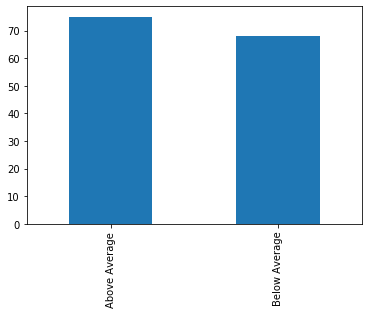

In [84]:
#Show class barchart
all_data_lag['Shipment Performance Category'].value_counts().plot('bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233D544B3C8>]],
      dtype=object)

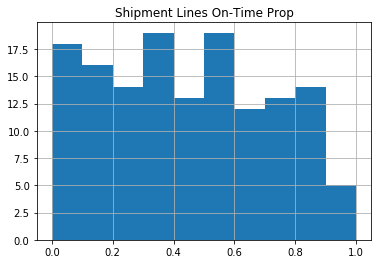

In [86]:
#Show histogram of raw proportion values
all_data_lag.hist(column=['Shipment Lines On-Time Prop'])

At first it appeared as though it may have been an imbalance in data, however, the collective data is fairly balanced, as it should be considered the average should roughly split the data in half if the distribution is Gaussian. Above we can see the class counts as well as the distribution of the raw proportion values, from this we can see that the class counts are roughly even although the proportions are not really Gaussian (fairly evenly distributed for most of the range save for a couple spike and major dip in the last decile).

### Logistic Regression (LogR)

Since neither model quite makes the grade laid out in the objectives (Random Forest Classifier comes very close), we will also try logistic regression. This may assist with the non-linearity of some measures, but the lack of data may be an issue as with other models.

In [108]:
#Import necessary namespaces
from sklearn.linear_model import LogisticRegression

#Create model
logr_1 = LogisticRegression()

#Fit model
logr_1.fit(lag_clas_train_x, lag_clas_train_y)

#Make predictions
logr_1_preds = logr_1.predict(lag_clas_test_x)

#Print coefficients
print('Coefficients: \n', logr_1.coef_)

#Show metrics
print("=== Confusion Matrix ===")
print(confusion_matrix(lag_clas_test_y, logr_1_preds))
print('\n')

print("=== Classification Report ===")
print(classification_report(lag_clas_test_y, logr_1_preds))
print('\n')

print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score: ", logr_1.score(lag_clas_test_x,lag_clas_test_y))

Coefficients: 
 [[-1.31639901e-05  9.50588995e-06  1.19266679e-09 -2.26644531e-06
  -8.59737948e-08  7.23526350e-09  6.58514074e-09  3.14561976e-09
   9.26401232e-11  3.23727275e-09  3.23727275e-09  2.84892424e-09
  -6.91622022e-07 -1.06275820e-06 -2.58325262e-06 -1.66545653e-09
  -1.77306238e-09 -1.66635085e-09 -1.58290195e-09 -1.63403382e-09
  -1.63268042e-09 -1.47229705e-09 -1.63907086e-09]]
=== Confusion Matrix ===
[[ 7 14]
 [ 1  7]]


=== Classification Report ===
               precision    recall  f1-score   support

Above Average       0.88      0.33      0.48        21
Below Average       0.33      0.88      0.48         8

     accuracy                           0.48        29
    macro avg       0.60      0.60      0.48        29
 weighted avg       0.73      0.48      0.48        29



=== Mean Accuracy Score ===
Mean Accuracy Score:  0.4827586206896552


Unfortunately, the Logistic Regression did not perform as well as the other models, and thus cannot be considered.

## Conclusions

### Best Model
Our best performing model was the third iteration of the Random Forest model (in this case it was a classification model). It appears that although there was very little data, the model was able to fairly accurately predict the outcomes. It may be possible to use bootstrapping to increase the accuracy, but it may come at the cost of overfitting the model. For the time being, this model will be the one considered as the final result. As this model is the best performer, is worth taking a look at some of the pieces more in depth.

### Feature Importance

In [113]:
#Examine feature importance
feature_importances = pd.DataFrame(rf_3.feature_importances_, index = lag_clas_train_x.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Total Production Lines,0.108535
National Case Increase Percent,0.105502
Total Time,0.094762
National Cases/100k,0.087472
Prod Line Lag2,0.074672
Prod Time Lag2,0.073620
Production Hours On-Time Prop,0.072914
New National Cases,0.065660
National Deaths/100k,0.065243
Total Shipment Lines,0.060882


Here we can see which features have the highest importance (impurity based metrics provided by the model object returned using the sklearn package). Each one of the highest importance is interesting to consider:
- Total Production Lines
    - This is effectively the volume of production on that date that was completed. It is interesting to note that this relationship occurs, as it likely indicates a labor shortage or something of that nature. It is unlikely that the current day's production volume is directly affecting the outcomes of shipping, rather there is probably an unmeasured feature that impacts both.
    - In future analysis the number of claimed labor hours or perhaps the sum of paid hours can be considered. This would show whether the production lines are directly affecting the shipping performance or if the labor availability is affecting both in the same manner.
- National Case Increase Percent
    - This feature is effectively demonstrating how much "larger" the pandemic is nationally compared to the previous day. Interestingly, it is highly correlated with the number of new national cases (as it is built on the number of new cases vs the previous number of cases) but is more stronly predictive of shipping outcomes.
    - Perhaps inclusion of a local version would have similar effect, or perhaps the national situation dictates much of the societal impacts throughout the nation. 
- Total Time
    - This is a metric very similar to Total Production Lines, but is a better indicator of the "effort" that day. It is a figure that relates all productions together based on a shared unit, whereas quantity can be easily swayed by quick to build but high quantity items.
    - This could perhaps be removed or used as a replacement for Total Production Lines.
- Prod Line Lag 2 and Prod Time Lag 2
    - These features are interesting in combination as they actually show the impact of our buffer time (outbound warehouse handling as we call it) on the shipment performance. This must indicate that the day two days prior has a real impact on the performance while 1 and 3 day do not.
    - It may be of value to include similarly lagged value for the raw production line count and the production time count, rather than just the on-time proportions. This would remove the assembly "performance" from consideration and replace it with assembly "workload" instead.

### Intuitions

These finding would suggest that the intuitions shared across the company may have some validity, namely:
- Production volume is a big determiner of shipping performance
- Production performance can propogate to the shipping group
- Covid-19 has had impacts when national cases are on the rise, but not directly due to mandates

### Future Research

These are not particularly surprising facts, as our business is an essential business, so very few workers were forced to stay at home even while mandates were in place. However, we did have massive labor shortages during the most extreme periods. Perhaps capturing labor usage/availability would be of use in this case.

We additionally found that the productoin volumes had a significant impact, which may suggest that the shipping group is understaffed relative to the production group, or that the production group is simply able to handle higher workloads.

It is also possible that the availability of shipping capacity (from companies like XPO Logistics, Fedex, and UPS) may have been impacted during this time, holding us from shipping materials. In order to accomodate this possibility it would be worthwhile to collect shipping capacity data during the time period. This data is likely to be hard to come by though as much of it is proprietary.

Lastly, the inclusion of additional resource metrics may be of use, including:
- Average/daily assembly labor capacity
- Average/daily stockroom labor capacity
- Average/daily open shipping space
- Average/daily shipping space utilization

These factors may round out the picture further by showing the physical capacities and limits that could directly impact shipping's ability to send material out on time.

### Final Thoughts

Although the final model was not as accurate as desired, particularly in the "Below Average" predictions, the insights gained provide support for further examination. The most important features reinforced certain domain knowledge based conlusions, while also demonstrating space for improvement. Additional data (both externally and over the coming couple months) will be required in order to improve the model accuracy and predictive capacity.